In [2]:
import numpy as np

def train_threshold_function(T):
    T.sort(key=lambda x: x[0])
    best_threshold = None
    min_misclassification = len(T)
    
    for i in range(len(T) - 1):
        threshold = (T[i][0] + T[i + 1][0]) / 2
        misclassification = sum([1 for x, y in T if (x >= threshold) != y])
        
        if misclassification < min_misclassification:
            min_misclassification = misclassification
            best_threshold = threshold
            
    def classify(x):
        return int(x >= best_threshold)
    return classify

In [3]:

def train_multidimension_threshold_function(T):
    T.sort(key=lambda x: min(x[0]))
    T_projections = [min(x) for x,_ in T]
    best_threshold = None
    min_misclassification = len(T)
    
    for i in range(len(T) - 1):
        threshold = (T_projections[i] + T_projections[i + 1]) / 2
        
        misclassification = sum([1 for x,y in T if int(all(x >= threshold)) != y])
        
        if misclassification < min_misclassification:
            min_misclassification = misclassification
            best_threshold = threshold
    
    def classify(x):
        return int(all(np.array(x) >= best_threshold))
    return classify

In [4]:
def train_multiclass_threshold_function(T):
    # number of classes = number of dimensions according to the problem statement
    thresholds = [0]*len(T[0][0])
    
    for i in range(len(T[0][0])):
        thresholds[i] = train_multidimension_threshold_function([(x, y[i]) for x, y in T])

    def classify(x):
        return [classify(x) for classify in thresholds]
    return classify

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('iris.data', header=None)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data['class no.'] = data['species'].astype('category').cat.codes
data.drop(['sepal_length'], inplace=True, axis=1)
stds = data.std()[:3].values
mus = data.mean()[:3].values
mins = data.min()[:3].values
maxs = data.max()[:3].values

def normalize(x):
    return (x - mus) / stds
    # return (x-mins)/(maxs-mins)

def vectorize(x):
    y = [0]*3
    y[x] = 1
    return y

# X = list(map(normalize,data.values[:, :3]))
X = data.values[:, :3]
Y = data['class no.'].apply(vectorize)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
data

/tmp/ipykernel_16859/2561982782.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stds = data.std()[:3].values
/tmp/ipykernel_16859/2561982782.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mus = data.mean()[:3].values


,sepal_width,petal_length,petal_width,species,class no.
0,3.5,1.4,0.2,Iris-setosa,0
1,3.0,1.4,0.2,Iris-setosa,0
2,3.2,1.3,0.2,Iris-setosa,0
3,3.1,1.5,0.2,Iris-setosa,0
4,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...
145,3.0,5.2,2.3,Iris-virginica,2
146,2.5,5.0,1.9,Iris-virginica,2
147,3.0,5.2,2.0,Iris-virginica,2
148,3.4,5.4,2.3,Iris-virginica,2


In [6]:
classify = train_multiclass_threshold_function(list(zip(X_train,Y_train)))
data['predicted class'] = [classify(x) for x in X]

data['all correct'] = [int(x == y) for x, y in zip(data['predicted class'],Y)]
data['somewhat correct'] = [int(x[y]) for x,y in zip(data['predicted class'],data['class no.'])]

Y_train_pred = [classify(x) for x in X_train]
train_all_correct = [int(x == y) for x, y in zip(Y_train_pred,Y_train)]
train_somewhat_correct = [int(x[y.index(1)]) for x,y in zip(Y_train_pred,Y_train)]

Y_test_pred = [classify(x) for x in X_test]
test_all_correct = [int(x == y) for x, y in zip(Y_test_pred,Y_test)]
test_somewhat_correct = [int(x[y.index(1)]) for x,y in zip(Y_test_pred,Y_test)]

print(f"{sum(train_all_correct)} all correct classifications out of {len(X_train)} samples of training data: {round(sum(train_all_correct)*100/len(X_train),2)}%")
print(f"{sum(train_somewhat_correct)} somewhat correct classifications out of {len(X_train)} samples of training data: {round(sum(train_somewhat_correct)*100/len(X_train),2)}%")
print(f"{sum(test_all_correct)} all correct classifications out of {len(X_test)} samples of validation data: {round(sum(test_all_correct)*100/len(X_test),2)}%")
print(f"{sum(test_somewhat_correct)} somewhat correct classifications out of {len(X_test)} samples of validation data: {round(sum(test_somewhat_correct)*100/len(X_test),2)}%")
data

39 all correct classifications out of 120 samples of training data: 32.5%
76 somewhat correct classifications out of 120 samples of training data: 63.33%
9 all correct classifications out of 30 samples of validation data: 30.0%
20 somewhat correct classifications out of 30 samples of validation data: 66.67%


,sepal_width,petal_length,petal_width,species,class no.,predicted class,all correct,somewhat correct
0,3.5,1.4,0.2,Iris-setosa,0,"[0, 0, 0]",0,0
1,3.0,1.4,0.2,Iris-setosa,0,"[0, 0, 0]",0,0
2,3.2,1.3,0.2,Iris-setosa,0,"[0, 0, 0]",0,0
3,3.1,1.5,0.2,Iris-setosa,0,"[0, 0, 0]",0,0
4,3.6,1.4,0.2,Iris-setosa,0,"[0, 0, 0]",0,0
...,...,...,...,...,...,...,...,...
145,3.0,5.2,2.3,Iris-virginica,2,"[0, 1, 1]",0,1
146,2.5,5.0,1.9,Iris-virginica,2,"[0, 1, 1]",0,1
147,3.0,5.2,2.0,Iris-virginica,2,"[0, 1, 1]",0,1
148,3.4,5.4,2.3,Iris-virginica,2,"[0, 1, 1]",0,1


We trained the model on 80% of the data set and tested its performance on the rest of the data it had yet to see. We saw great results on validation data that were about equal to the model's performance on training data. This is a good sign that the model is not overfitting. The metrics we used to evaluate our model were "all correct %" and "somewhat correct %". All correct classifications were ones where the correct class was classified as positive and all other classes were classified as negative. Somewhat correct classifications were ones where the correct class was classified as positive. Overall the accuracy of the algorithm is quite low, but we think that the results are actually very good given the constraints of a single parameter model in a multiclass, multidimension space.

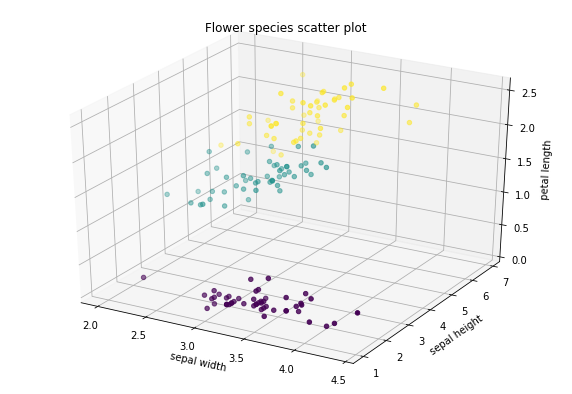

In [7]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,7)
fig = plt.figure()

ax = plt.axes(projection ='3d')

x = [x[0] for x in X]
y = [x[1] for x in X]
z = [x[2] for x in X]
c = [y.index(1) for y in Y]
ax.scatter(x, y, z, c = c)

ax.set_xlabel('sepal width')
ax.set_ylabel('sepal height')
ax.set_zlabel('petal length')

ax.set_title('Flower species scatter plot')
plt.show()

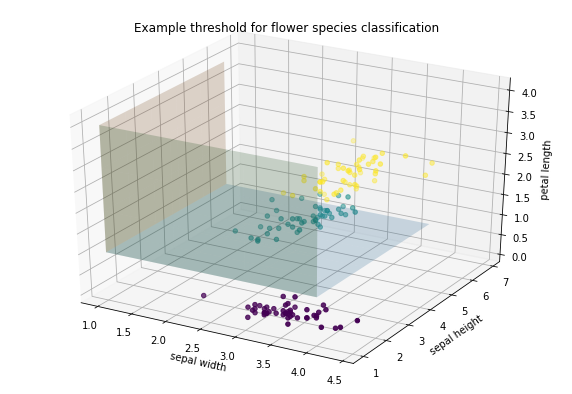

In [48]:
plt.rcParams["figure.figsize"] = (10,7)
fig = plt.figure()

ax = plt.axes(projection ='3d')

x = [x[0] for x in X]
y = [x[1] for x in X]
z = [x[2] for x in X]
c = [y.index(1) for y in Y]
ax.scatter(x, y, z, c = c)

tau = 1
xx, yy = np.meshgrid(range(tau,5,1), range(tau,7,1))
z = np.ones(yy.shape)*tau
ax.plot_surface(xx, yy, z, alpha=.2)

yy, zz = np.meshgrid(range(tau,7,1), range(tau,5,1))
x = np.ones(yy.shape)*tau
ax.plot_surface(x, yy, zz, alpha=.2)

zz, xx = np.meshgrid(range(tau,5,1), range(tau,5,1))
y = np.ones(zz.shape)*tau
ax.plot_surface(xx, y, zz, alpha=.2)

ax.set_xlabel('sepal width')
ax.set_ylabel('sepal height')
ax.set_zlabel('petal length')

ax.set_title('Example threshold for flower species classification')
plt.show()